### 첫번째 시간입니다
- 하이~


###목표
- 학생들의 수학성적을 예측하는 회귀 모델을 만들어보자
- keras를 이용해 신경망을 구성하는 방법을 익혀보자

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 현재 작업 경로 출력
%pwd

'/content'

In [7]:
%cd /content/drive/MyDrive/sw캠프 데이터 비즈니스 과정

/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정


In [8]:
%pwd

'/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정'

In [12]:
# 모든 컬럼 표시
pd.set_option('display.max_columns', None)
# 데이터 불러오기
data = pd.read_csv('data/student-mat.csv', delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


- 문제, 정답 분리

In [13]:
X = data['studytime']
y = data['G3']

In [14]:
X.shape , y.shape

((395,), (395,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((296,), (99,), (296,), (99,))

### 신경망 모듈 만들기
1. 신경망 구조 설계
2. 신경망 학습 및 평가 방법 설정
3. 학습 및 학습과정 시각화
4. 모델 평가

In [18]:
# 신경망의 뼈대를 구축하기 위한 함수
from tensorflow.keras import Sequential

# inputLayer : 신경망 입력층을 생성
# Dense : 신경망 층(뉴런의 묶음)을 구성해주는 함수
from tensorflow.keras.layers import InputLayer, Dense

In [19]:
# 1. 신경망 구조 설계
# 신경망 뼈대 설정
model = Sequential()

# 입력층 설정
# input_shape : 입력데이터의 특성 형태를 설정(1개의 특성을 가진 1차원 데이터)
model.add(InputLayer(input_shape=(1,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 함수(괄호 안의 숫자는 해당 층에 있는 뉴런의 개수)
model.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 2. 신경망 학습 및 평가 방법 설정
# 손실함수(비용함수), 최적화 함수 설정
model.compile(
    loss = 'mse',
    optimizer='SGD'
)

In [21]:
# 3. 학습 및 시각화
h = model.fit(X_train, y_train, epochs=100)
#epochs : 학습 횟수 설정

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 49.0010
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 31.3085
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 29.3123
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 28.7139
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 28.3587
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 28.0488
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 27.6891
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 27.4084
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 27.1102
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 26.8035
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 26.5196
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 26.2715
Epoch 13/100
10/10 [=====

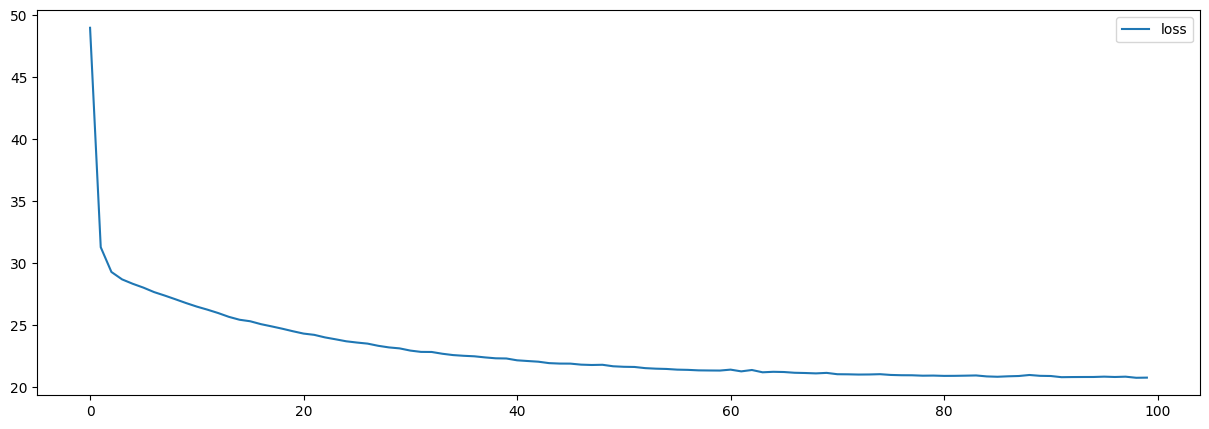

In [25]:
# 3. 학습과정 시각화
plt.figure(figsize=(15,5))
plt.plot(h.history['loss'], label='loss')
plt.legend()
plt.show()

- 초반에는 빠르게 loss 값(mse)이 떨어지고 있음
- 경사하강법 초반에는 가중치, 절편값이 임의의 값으로 설정되어 있기 때문에 학습시켜도 mse가 빠르게 줄어드는 것을 볼수 있음

In [26]:
# 4. 모델평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 21.0266


21.02656364440918

### 입력 특성이 2개인 모델을 직접 만들어보자
- 문제 (studytime, traveltime) - X1
- 정답 (G3) - y1
- 신경망의 최종 출력층 뉴런 개수는 1개

In [79]:
X1 = data[['studytime','traveltime']]
y1 = data['G3']

In [80]:
X1.shape, y1.shape

((395, 2), (395,))

In [81]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=200)

In [82]:
# 1. 신경망 구조 설계
# 신경망 뼈대 설정
model1 = Sequential()

# 입력층 설정
# input_shape : 입력데이터의 특성 형태를 설정(1개의 특성을 가진 1차원 데이터)
model1.add(InputLayer(input_shape=(2,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 함수(괄호 안의 숫자는 해당 층에 있는 뉴런의 개수)
model1.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 2. 신경망 학습 및 평가 방법 설정
# 손실함수(비용함수), 최적화 함수 설정
model1.compile(
    loss = 'mse',
    optimizer='SGD'
)

In [84]:
# 3. 학습 및 시각화
h1 = model1.fit(X1_train, y1_train, epochs=100)
#epochs : 학습 횟수 설정

Epoch 1/100
10/10 [==============================] - 1s 7ms/step - loss: 72.9618
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 30.7493
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 29.2360
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 28.7464
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 28.5166
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 28.3861
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 28.1367
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 27.8539
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 27.5761
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 27.5187
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 27.4004
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 27.1639
Epoch 13/100
10/10 [=====

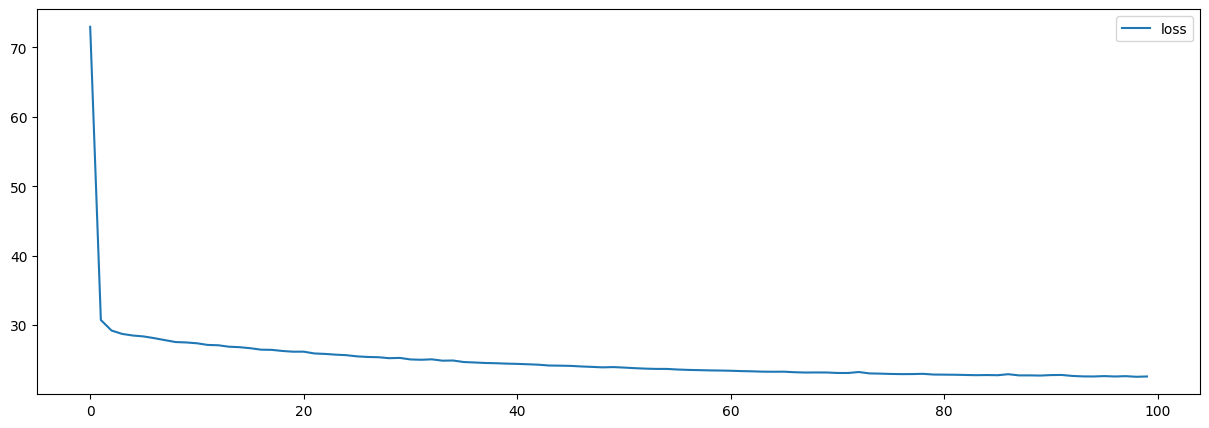

In [85]:
# 3. 학습과정 시각화
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'], label='loss')
plt.legend()
plt.show()

In [86]:
# 4. 모델평가
model1.evaluate(X1_test, y1_test)

4/4 [==============================] - 0s 3ms/step - loss: 16.2949


16.294946670532227